In [2]:
#loading Mnist data set
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh
import seaborn as sns
from sklearn import decomposition
os.chdir("C:\\Users\\Chaitanya Narva\\Documents")

label of the image is 8


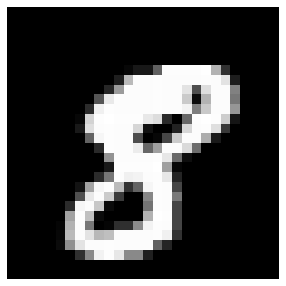

In [8]:
mnist=pd.read_csv("mnist_train.csv")
label=mnist["label"]
data=mnist.drop("label",axis=1)

#printing the datapoint
idx=10
print("label of the image is",label[idx])
plt.figure(figsize=(5,5))
matrix=np.matrix(data.iloc[10]).reshape(28,28)
plt.imshow(matrix,cmap='gray')
plt.axis('off')
plt.show()

(42000, 784)
label of the image is 8


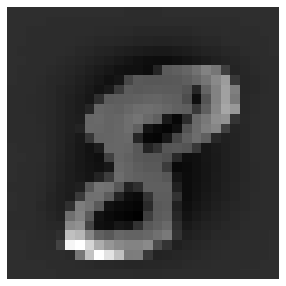

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit_transform(data)
print(scaler.shape)

index=10
print("label of the image is",label[idx])
plt.figure(figsize=(5,5))
matrix=np.matrix(scaler[index]).reshape(28,28)
plt.imshow(matrix,cmap='gray')
plt.axis('off')
plt.show()

### Method-1:

In [12]:
#step-2: finding covariance_matrix

covariance_matrix=np.matmul(standard.T,standard)
print(covariance_matrix.shape)

(784, 784)


In [16]:
#step-3: finding the eigen vectors and eigen values for the covariance matrix
from scipy.linalg import eigh

values,vectors=eigh(covariance_matrix,eigvals=[782,783])
print(vectors.shape)

#calculating the %variance
preserved_variance=values[1]/(values[0]+values[1])
print("The amount of variance we preserved after dimensionality reduction to 2 :",int(preserved_variance*100))
#I have preserved nearly 58% of the data

(784, 2)
The amount of variance we preserved after dimensionality reduction to 2 : 58


In [42]:
#step-4: dimension reduction

new_data=np.matmul(scalars,vectors)
new_data=new_data.T
print(new_data.shape)

(2, 42000)


In [43]:
#PCA(principal component analysis)
# plotting the datapoints

new_data=np.vstack((new_data,label))
new_data=new_data.T
print(new_data.shape)
# converting the matrix into dataframe

dataframe=pd.DataFrame(data=new_data,columns=["1st","2nd","label"])
dataframe.head(5)

(42000, 3)


,1st,2nd,label
0,-5.226445,-5.140478,1.0
1,6.032996,19.292332,0.0
2,-1.705813,-7.644503,1.0
3,5.836139,-0.474207,4.0
4,6.024818,26.559574,0.0


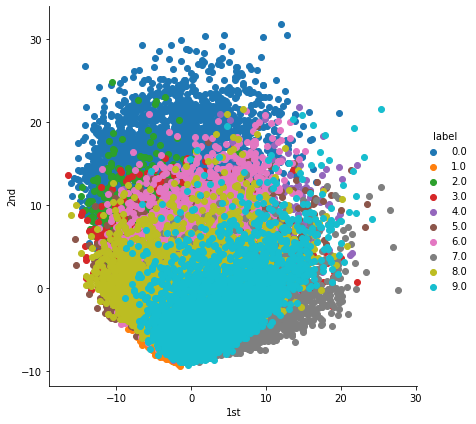

In [58]:
#import seaborn as sns
sns.FacetGrid(dataframe,hue="label",height=6).map(plt.scatter,"1st","2nd").add_legend()
plt.show()

In [52]:
#import sklearn.decomposition
pca=decomposition.PCA()
pca.n_components=2
pca_data=pca.fit_transform(data).T
print(pca_data.shape)

(2, 42000)


In [55]:
pca_new=np.vstack((pca_data,label)).T
print(pca_new.shape)
#converting into dataframe
df=pd.DataFrame(data=pca_new,columns=["1st","2nd","labels"])
df.head(5)

(42000, 3)


,1st,2nd,labels
0,-661.598292,-699.297055,1.0
1,1701.451174,-360.548838,0.0
2,-886.897998,-293.743462,1.0
3,-165.754665,300.176102,4.0
4,1923.710990,-449.154609,0.0


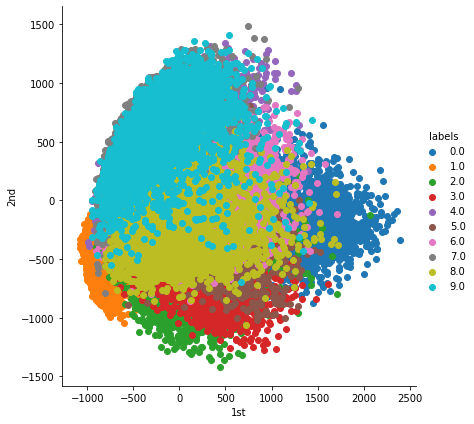

In [57]:
#plotting the df
sns.FacetGrid(df,hue="labels",height=6).map(plt.scatter,"1st","2nd").add_legend()
plt.show()

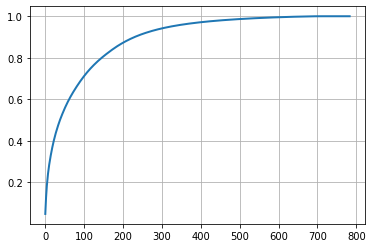

In [106]:
# percentage_variance_explained
pca.n_components=784
pca_data=pca.fit_transform(standard.T)
var_per=pca.explained_variance_/np.sum(pca.explained_variance_)
cum_sum=np.cumsum(var_per)
plt.figure(1,figsize=(6,4))
plt.clf()
plt.plot(cum_sum,linewidth=2)
plt.grid()
plt.show()

### Linear Discriminant Analysis:

In [18]:
from sklearn.datasets import load_iris
import numpy as np
iris = load_iris()
iris.data.shape

(150, 4)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(iris.data)
data=scaler.transform(iris.data)

In [24]:
data[2]

array([-1.38535265,  0.32841405, -1.39706395, -1.3154443 ])

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA()
lda = LDA(n_components=2)
lda_result = lda.fit_transform(data, iris.target)

Text(0.5, 1.0, 'LDA on iris')

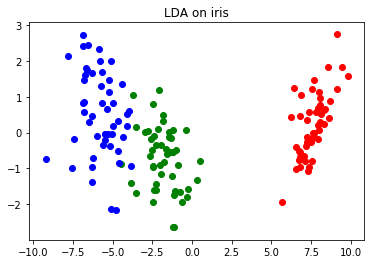

In [26]:
import matplotlib.pyplot as plt
plt.scatter(lda_result[iris.target==0, 0], lda_result[iris.target==0, 1], color='r')
plt.scatter(lda_result[iris.target==1, 0], lda_result[iris.target==1, 1], color='g') 
plt.scatter(lda_result[iris.target==2, 0], lda_result[iris.target==2, 1], color='b') 
plt.title('LDA on iris')

### PCA vs LDA:

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(iris.data)

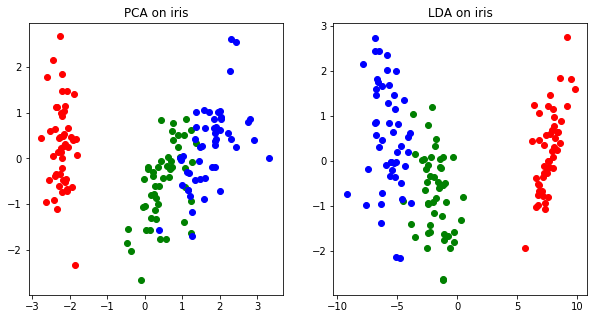

In [33]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(pca_result[iris.target==0, 0], pca_result[iris.target==0, 1], color='r')
plt.scatter(pca_result[iris.target==1, 0], pca_result[iris.target==1, 1], color='g') 
plt.scatter(pca_result[iris.target==2, 0], pca_result[iris.target==2, 1], color='b') 
plt.title('PCA on iris')

# for LDA
plt.subplot(1,2,2)
plt.scatter(lda_result[iris.target==0, 0], lda_result[iris.target==0, 1], color='r')
plt.scatter(lda_result[iris.target==1, 0], lda_result[iris.target==1, 1], color='g') 
plt.scatter(lda_result[iris.target==2, 0], lda_result[iris.target==2, 1], color='b') 
plt.title('LDA on iris')
plt.show()